### Task1

Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [1]:
import numpy as np 
from matplotlib import pyplot as plt 
import pandas as pd 
from scipy import stats 
from sklearn.linear_model import LinearRegression #pip install scikit-learn


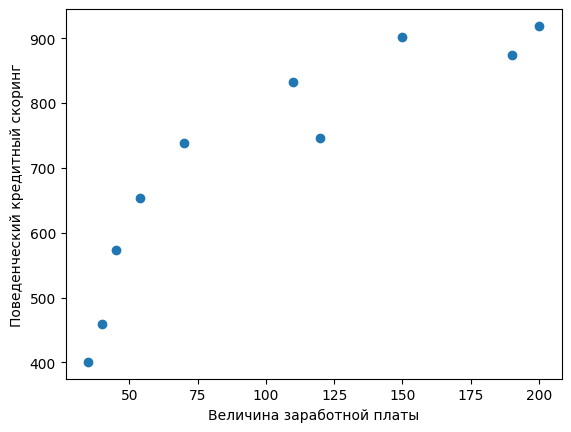

In [2]:
x = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
plt.scatter(x,y)
plt.xlabel('Величина заработной платы')
plt.ylabel('Поведенческий кредитный скоринг', rotation=90)
plt.show()

Формула линейной регрессии $y = \beta_0 + \beta_1 * x$

Коэффициенты 
\
$\beta_1 = \frac{n\sum_{i=1}^n x_i y_i - (\sum_{i=1}^n x_i)(\sum_{i=1}^n y_i)}{n\sum_{i=1}^n x_i^2 - (\sum_{i=1}^n x_i)^2}$,

$\beta_0 = \bar{y} - \beta_1 \cdot \bar{X}$

In [3]:
b1 = (len(x)*np.sum(x*y) - np.sum(x)*np.sum(y))/(len(x)*np.sum(x**2) - np.sum(x)**2)
b1

2.6205388824027653

In [4]:
b0=np.mean(y) - b1*np.mean(x)
b0

444.17735732435955

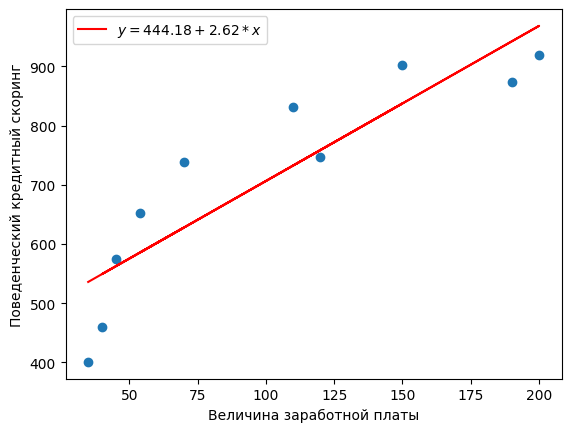

In [5]:
plt.scatter(x,y)
plt.plot(x, b0+b1*x, c = 'r', label=r'$y=444.18+2.62*x$')
plt
plt.legend()
plt.xlabel('Величина заработной платы')
plt.ylabel('Поведенческий кредитный скоринг', rotation=90)
plt.show()

Рассчитаем без интерсепта

In [6]:
X = x.reshape((len(x),1))
X

array([[ 35],
       [ 45],
       [190],
       [200],
       [ 40],
       [ 70],
       [ 54],
       [150],
       [120],
       [110]])

In [7]:
Y=y.reshape((len(x),1))
Y

array([[401],
       [574],
       [874],
       [919],
       [459],
       [739],
       [653],
       [902],
       [746],
       [832]])

In [8]:
B = np.dot(np.linalg.inv(np.dot(X.T,X)),X.T @ y)
B

array([5.88982042])

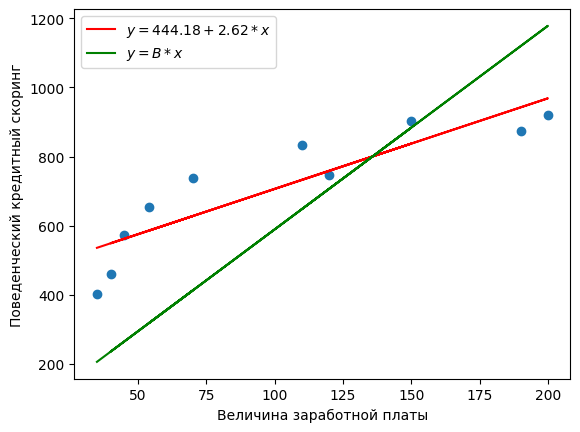

In [9]:
plt.scatter(x,y)
plt.plot(x, b0+b1*x, c = 'r', label=r'$y=444.18+2.62*x$')
plt.plot(x, B*x, c = 'g', label=r'$y={B}*x$')
plt
plt.legend()
plt.xlabel('Величина заработной платы')
plt.ylabel('Поведенческий кредитный скоринг', rotation=90)
plt.show()

### Task2

Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

В качестве функции потерь выберем **среднеквадратичную** функцию:
$\displaystyle MSE=\frac{1}{n}\sum^{n}_{i=1}(\hat y_i-y_i)^2$  которая будет показывать, насколько далеко истинные значения зависимого признака будут находиться от линии регресии(расчетных значений)    

In [10]:
y_pred = b1*x
mse = np.sum((y_pred -y)**2)/len(x)
def mse_ (B1, y=y, x=x, n=len(x)):
    return np.sum((B1*x - y)**2)/n
B1 = 0.1
print(mse)
print(mse_(B1))



203763.93896082853
518336.326


In [11]:
def mse_p(b1, x =x, y =y):
    return (2/len(x))*np.sum((b1*x-y)*x)

In [12]:
alfa = 0.000001
i_min = 1
b_min = B1
mse_min = mse_(B1)

for i in range(10000):
    B1 -= alfa*mse_p(B1,x,y)    
    if mse_(B1) > mse_min:
         print(f'Итерация #{i_min}, b={b_min}, mse={mse_min},\nДостигнут минимум.')
         break
    else:
        mse_min=mse_(B1)
        i_min=i
        b_min=B1


Итерация #628, b=5.889820285147628, mse=56516.85841571966,
Достигнут минимум.


In [13]:
b_min

5.889820285147628

### Task3

Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

In [16]:
def mse_p (b0, b1, x=x, y=y, n=len(x)):
    return np.sum((b0+b1*x-y)**2)/n

def mse_p0(b0, b1, x=x, y=y, n=len(x)): #Производная по b0
    return 2*np.sum(b0+b1*x-y)/n

def mse_p1(b0, b1, x=x, y=y, n=len(x)): # Производная по b1
    return 2*np.sum((b0+b1*x-y)*x)/n

In [27]:
B0=0.1
B1=0.1
mse_min = mse_p(B0, B1)
print(mse_min)
alfa = 5e-05
i_min = 1
b1_min = B1
b0_min = B0


for i in range(1000000):
    B0 -= alfa*mse_p0(B0, B1)    
    B1 -= alfa*mse_p1(B0, B1)
    if i%50000==0:
        print(f'Итерация #{i}, a={b0}, b={b1}, mse={mse_p(b0, b1)}')
    if mse_p(B0,B1) > mse_min:
         print(f'Итерация #{i_min}, b0={b0_min}, b1={b1_min}, mse={mse_min},\nДостигнут минимум.')
         break
    else:
        mse_min=mse_p(B0,B1)
        i_min=i
        b1_min=B1
        b0_min=B0

print(f'{b0} -> b0 = {b0_min}\n', f'{b1} -> b0 = {b1_min}\n')

518196.3839999999
Итерация #0, a=444.17735732435955, b=2.6205388824027653, mse=6470.414201176658
Итерация #50000, a=444.17735732435955, b=2.6205388824027653, mse=6470.414201176658
Итерация #100000, a=444.17735732435955, b=2.6205388824027653, mse=6470.414201176658
Итерация #150000, a=444.17735732435955, b=2.6205388824027653, mse=6470.414201176658
Итерация #200000, a=444.17735732435955, b=2.6205388824027653, mse=6470.414201176658
Итерация #250000, a=444.17735732435955, b=2.6205388824027653, mse=6470.414201176658
Итерация #300000, a=444.17735732435955, b=2.6205388824027653, mse=6470.414201176658
Итерация #350000, a=444.17735732435955, b=2.6205388824027653, mse=6470.414201176658
Итерация #400000, a=444.17735732435955, b=2.6205388824027653, mse=6470.414201176658
Итерация #450000, a=444.17735732435955, b=2.6205388824027653, mse=6470.414201176658
Итерация #500000, a=444.17735732435955, b=2.6205388824027653, mse=6470.414201176658
Итерация #520164, b0=444.17653163778414, b1=2.62054495966686, ms

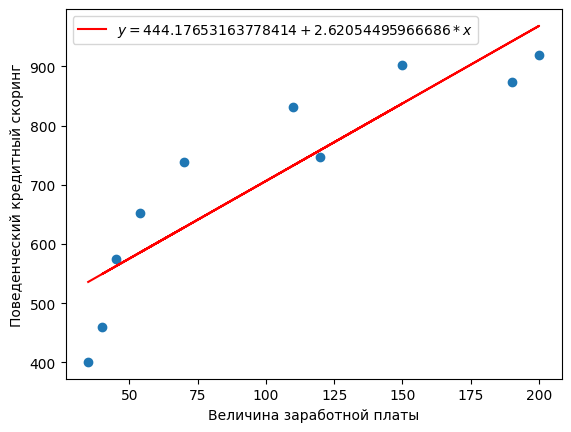

In [28]:
plt.scatter(x,y)
plt.plot(x, b0_min+b1_min*x, c = 'r', label=r'$y=444.17653163778414+2.62054495966686*x$')
plt
plt.legend()
plt.xlabel('Величина заработной платы')
plt.ylabel('Поведенческий кредитный скоринг', rotation=90)
plt.show()